In [0]:
import numpy as np
from scipy import stats
from scipy import integrate
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
def is_digit(x):
  if x.isdigit():
    return True
  try:
    float(x)
    return True
  except ValueError:
    return False

# Часть 1

## Получение всех данных из csv

In [0]:
all_data = pd.read_csv('bands_new.csv')

all_data

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg: nominal,cylinder division,paper type,ink type,direct steam,solvent type,type on cylinder,press type,press: nominal,unit number,cylinder size,paper mill location,plating tank,proof cut,viscosity,caliper,ink temperature,humifity,roughness,blade pressure,varnish pct,press speed,ink pct,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,Motter94,821,2,TABLOID,NorthUS,None,55,46,0.3,15.0,80,0.75,20,6.6,1900,54.9,38.5,0,0.0,2.5,0.7,34,40,105,100,noband
1,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,WoodHoe70,815,9,CATALOG,NorthUS,None,62,40,0.433,16.0,80,None,30,6.5,1850,53.8,39.8,0,0.0,2.8,0.9,40,40,103.87,100,noband
2,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WoodHoe70,816,9,CATALOG,NorthUS,1910,52,40,0.3,16.0,75,0.3125,30,5.6,1467,55.6,38.8,0,0.0,2.5,1.3,40,40,108.06,100,noband
3,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,WoodHoe70,816,2,TABLOID,None,1910,50,46,0.3,17.0,80,0.75,30,0.0,2100,57.5,42.5,5,0.0,2.3,0.6,35,40,106.67,100,noband
4,19910104,T218,MASSEY,38039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WoodHoe70,816,2,CATALOG,NorthUS,1910,50,40,0.267,16.8,76,0.4375,28,8.6,1467,53.8,37.6,5,0.0,2.5,0.8,40,40,103.87,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,19900818,X91,LAZARUS,34154,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,NO,Motter94,828,2,TABLOID,None,1910,45,56,0.333,14.9,85,1,30,17.3,1600,48.1,34.6,0,0.0,2.8,1,40,35,100,100,noband
295,19900818,X132,LAZARUS,34154,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,NO,Motter94,828,10,TABLOID,CANADIAN,1910,30,56,0.367,14.7,83,1,30,10.8,1600,53.8,35.5,0,6.0,2.6,1.2,40,35,100,100,noband
296,19900820,X377,AMES,34585,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,Motter94,828,2,TABLOID,CANADIAN,1910,57.5,57,0.367,15.3,84,1,30,19.0,2400,47.6,33.3,0,0.0,3,1,33,40,93.75,100,noband
297,19900820,X129,AMES,34585,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,Motter94,828,10,TABLOID,CANADIAN,1910,57.5,57,None,14.2,78,1,30,10.5,2400,52.6,36.8,0,0.0,2.5,1,33,40,93.75,100,noband


## Получение первых и последних 10 строк

In [0]:
all_data[:10]

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg: nominal,cylinder division,paper type,ink type,direct steam,solvent type,type on cylinder,press type,press: nominal,unit number,cylinder size,paper mill location,plating tank,proof cut,viscosity,caliper,ink temperature,humifity,roughness,blade pressure,varnish pct,press speed,ink pct,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,Motter94,821,2,TABLOID,NorthUS,None,55,46,0.3,15.0,80,0.75,20,6.6,1900,54.9,38.5,0,0.0,2.5,0.7,34,40,105,100,noband
1,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,WoodHoe70,815,9,CATALOG,NorthUS,None,62,40,0.433,16.0,80,None,30,6.5,1850,53.8,39.8,0,0.0,2.8,0.9,40,40,103.87,100,noband
2,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WoodHoe70,816,9,CATALOG,NorthUS,1910,52,40,0.3,16.0,75,0.3125,30,5.6,1467,55.6,38.8,0,0.0,2.5,1.3,40,40,108.06,100,noband
3,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,WoodHoe70,816,2,TABLOID,None,1910,50,46,0.3,17.0,80,0.75,30,0.0,2100,57.5,42.5,5,0.0,2.3,0.6,35,40,106.67,100,noband
4,19910104,T218,MASSEY,38039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WoodHoe70,816,2,CATALOG,NorthUS,1910,50,40,0.267,16.8,76,0.4375,28,8.6,1467,53.8,37.6,5,0.0,2.5,0.8,40,40,103.87,100,noband
5,19910111,X249,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,Motter94,827,2,TABLOID,CANADIAN,1911,50,46,0.3,16.5,75,0.75,30,0.0,2600,62.5,37.5,6,0.0,2.5,0.6,30,40,106.67,100,noband
6,19910111,X788,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,Motter94,827,9,TABLOID,CANAdiAN,1911,50,46,0.2,16.5,75,0.75,28,0.0,2600,62.5,37.5,6,0.0,2.5,1.1,30,40,106.67,100,noband
7,19910112,M372,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,XYLOL,YES,Albert70,802,7,CATALOG,NorthUS,1910,50,45,0.367,12.0,70,0.75,60,0.0,1650,60.2,39.8,1.5,0.0,3,1,40,40,103.22,100,band
8,19910114,I320,CHILDCRAFT,37000,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WoodHoe70,815,2,CATALOG,NorthUS,1911,65,43,0.333,16.0,75,1,32,22.7,1750,45.5,31.8,0,0.0,3,1,38,40,106.66,100,noband
9,19910114,I337,CHILDCRAFT,37000,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WoodHoe70,815,9,CATALOG,NorthUS,1910,65,43,0.2,16.0,68,0.75,30,15.5,1750,48.5,35.9,0,0.0,3,1,38,40,106.6,100,noband


In [0]:
all_data[-10:]

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg: nominal,cylinder division,paper type,ink type,direct steam,solvent type,type on cylinder,press type,press: nominal,unit number,cylinder size,paper mill location,plating tank,proof cut,viscosity,caliper,ink temperature,humifity,roughness,blade pressure,varnish pct,press speed,ink pct,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
289,19900813,X184,WALMART,34493,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,Motter94,824,2,TABLOID,None,1910,30,54,0.167,14.6,70,0.8125,30,0.0,2000,58.8,41.2,0,0.0,1.5,0.6,30,35,106.9,100,noband
290,19900814,R22,TARGET,34549,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,WoodHoe70,816,9,SPIEGEL,CANADIAN,1910,45,54,0.167,18.0,90,0.5,26,8.3,1875,52.1,39.6,0,0.0,3,1,33,35,106.9,100,noband
291,19900812,R23,TARGET,34549,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,WoodHoe70,815,9,SPIEGEL,CANADIAN,1910,45,54,0.367,15.0,100,0.75,33,2.3,2000,56.8,40.9,0,0.0,2.75,0.9,33,35,106.9,100,noband
292,19900819,F236,DUNNS,38016,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,Motter70,813,1,CATALOG,None,1910,45,56,0.3,15.5,78,0.75,None,11.1,1350,55.5,33.3,0,0.0,2.2,0.9,28,35,100,100,noband
293,19900819,F38,DUNNS,38016,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,Motter70,813,5,CATALOG,None,1911,45,56,0.233,16.0,64,0.75,None,11.1,1350,55.5,33.3,0,0.0,2.5,0.5,28,40,103.3,100,noband
294,19900818,X91,LAZARUS,34154,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,NO,Motter94,828,2,TABLOID,None,1910,45,56,0.333,14.9,85,1,30,17.3,1600,48.1,34.6,0,0.0,2.8,1,40,35,100,100,noband
295,19900818,X132,LAZARUS,34154,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,NO,Motter94,828,10,TABLOID,CANADIAN,1910,30,56,0.367,14.7,83,1,30,10.8,1600,53.8,35.5,0,6.0,2.6,1.2,40,35,100,100,noband
296,19900820,X377,AMES,34585,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,Motter94,828,2,TABLOID,CANADIAN,1910,57.5,57,0.367,15.3,84,1,30,19.0,2400,47.6,33.3,0,0.0,3,1,33,40,93.75,100,noband
297,19900820,X129,AMES,34585,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,Motter94,828,10,TABLOID,CANADIAN,1910,57.5,57,None,14.2,78,1,30,10.5,2400,52.6,36.8,0,0.0,2.5,1,33,40,93.75,100,noband
298,19900830,T204,GALLS,38061,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,XYLOL,None,WoodHoe70,815,1,SPIEGEL,NorthUS,1911,47.5,49,0.367,15.0,84,0.75,28,2.2,1600,54.3,43.5,0,0.0,3,0.9,34,30,108.1,100,band


## Создание таблицы для всех числовых значений со столбцами: среднее значение (математическое ожидание), медиана, мода, минимальное значение, макcимальное значение, размах, дисперсия, среднеквадратичное отклонение)

In [0]:
col_arr = all_data.columns.array
cel_arr = all_data.to_numpy()
num_fields = set()
k = 0

for item in cel_arr:
  flag = False
  for i in range(len(col_arr)):
    if is_digit(str(item[i])) and str(item[i]) != 'nan':
      num_fields.add(col_arr[i])
      flag = True
    if flag:
      k+=1



num_fields.remove('cylinder number')
num_fields.remove('timestamp')

num_data = all_data[num_fields]

#Очистка данных от неккоретного заполнения 
for column in num_data.columns:
  num_data = num_data.loc[num_data[column].apply(lambda x: is_digit(str(x)))]

params = pd.DataFrame()
mean = num_data.mean().transpose()
mode = num_data.mode().transpose()
median = num_data.median().transpose()
minc = num_data.min().transpose()
maxc = num_data.max().transpose()
var = num_data.var().transpose()
std = num_data.std().transpose()

params.insert(0, 'Мат. ожидание', mean)
params.insert(1, 'Мода', mode[0])
params.insert(2, 'Медиана', median)
params.insert(3, 'Минимальное', minc)
params.insert(4, 'Максимальное', maxc)
params.insert(5, 'Размах', maxc - minc)
params.insert(6, 'Дисперсия', var)
params.insert(7, 'Среднеквадратическое отклонение', std)

print(params)




                  Мат. ожидание  ... Среднеквадратическое отклонение
roller durometer   3.447196e+01  ...                        4.498999
solvent pct        3.861168e+01  ...                        3.560148
press: nominal     8.189206e+02  ...                        7.829656
current density             inf  ...                             NaN
varnish pct        5.881308e+00  ...                        7.164409
humifity                    inf  ...                             NaN
ESA Voltage        2.601005e+02  ...                             NaN
blade pressure              inf  ...                             NaN
job number         3.610544e+04  ...                     4460.231405
chrome content     1.000000e+02  ...                        0.000000
plating tank                inf  ...                             NaN
unit number        5.214953e+00  ...                        3.290413
ESA Amperage       3.037383e-02  ...                        0.411413
press speed                 inf  .

## Вставить две гистограммы рядом для двух признаков

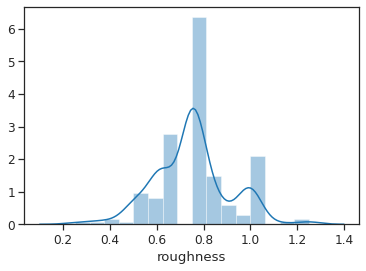

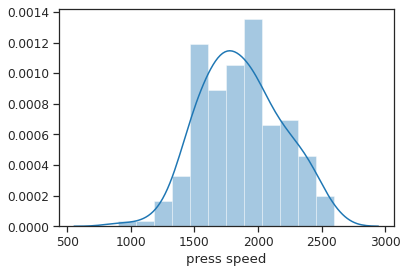

In [0]:
plot1 = sns.distplot(num_data['roughness'])
plot1 = plot1.get_figure()
plt.show()
plot2 = sns.distplot(num_data['press speed'])
plot2 = plot1.get_figure()
plt.show()

## Вставить изображение точек на плоскости для этих двух признаков для различных категорий

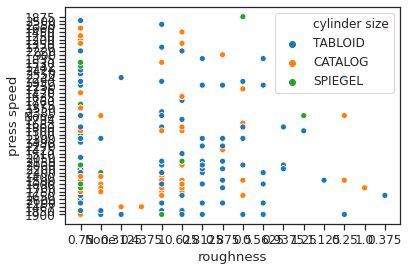

In [0]:

ax = sns.scatterplot(x="roughness", y="press speed",
                     hue="cylinder size",
                     data=all_data)

## Создать таблицу из двух столбцов с названиями "Первый столбец", "Второй столбец" с N данными, распределенными согласно нормальному закону с указанными математическим ожиданием M и среднеквадатичным отклонением отклонением S (N, S, M - из варианта)

In [0]:
import math
N = 190
M = 1
S = 0.75

num_data = num_data.astype('float')
df1 = pd.DataFrame({
    'Первый столбец': num_data['roughness'].head(N),
})
df1 = df1.apply(lambda x: (1/S*(2*math.pi)**0.5)*math.exp(-( (x-M)**2/(2*S*S) )) , axis=1)

df2 = pd.DataFrame({
    'Второй столбец': num_data['press speed'].head(N),
})
df2 = df2.apply(lambda x: (1/S*(2*math.pi)**0.5)*math.exp(-((x-M)**2/(2*S*S))) , axis=1)

table2 = pd.DataFrame({
    'Первый столбец': df1,
    'Второй столбец': df2,
})

print(table2)

     Первый столбец  Второй столбец
2          2.195658             0.0
3          3.161558             0.0
4          2.522803             0.0
5          3.161558             0.0
6          3.161558             0.0
..              ...             ...
258        3.161558             0.0
259        3.161558             0.0
260        3.342171             0.0
261        3.342171             0.0
262        3.161558             0.0

[190 rows x 2 columns]


## Диаграммы

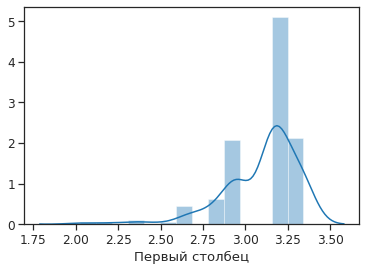

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


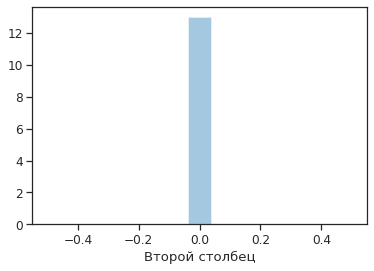

In [0]:
sns_pl = sns.distplot(table2['Первый столбец'])
plot = sns_pl.get_figure()
plt.show()

sns_pl = sns.distplot(table2['Второй столбец'])
plot = sns_pl.get_figure()
plt.show()

## Точечный рисунок

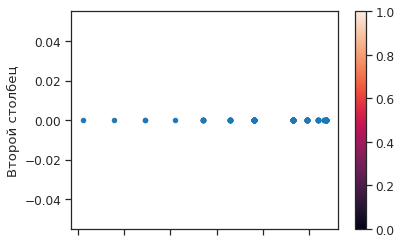

In [0]:
table2.plot.scatter(x='Первый столбец', y='Второй столбец', colormap='viridis')

plt.show()

# Часть 2

**Создание нового датафрейма только с нужными для исследования признаками**

In [0]:
def is_digit(x):
    if x.isdigit():
      return True
    try:
      float(x)
      return True
    except ValueError:
      return False

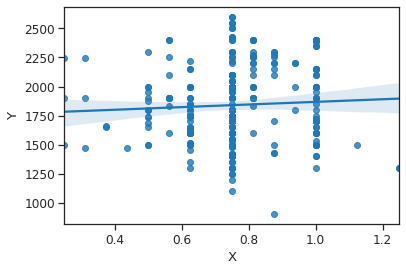

In [0]:
req_data = all_data.loc[:, ['roughness', 'press speed']]
req_data.columns = ['X', 'Y']
req_data = req_data.loc[req_data['X'].apply(lambda x: is_digit(x))]
req_data = req_data.loc[req_data['Y'].apply(lambda x: is_digit(x))]
req_data = req_data.astype('float')

g = sns.regplot(x='X', y='Y', data=req_data)

## Коэффецент Пирсона



In [0]:
mx = req_data['X'].mean()
my = req_data['Y'].mean()
mxy = (req_data['X'] * req_data['Y']).mean()

vx = req_data['X'].var()
vy = req_data['Y'].var()
vxy = (req_data['X'] * req_data['Y']).var()

r_r = (mxy - mx*my)/(vx*vy)**0.5
print('Ручное', r_r)

r_auto = np.corrcoef(req_data['X'], req_data['Y'])[0, 1]

print('Автоматическое', r_auto)

Ручное 0.057385534947128544
Автоматическое 0.05759121786808399


## p-value

In [0]:
def stud(t):
  return 1/(math.pi*(1+t**2))

def stud_g(t, n):
  return math.gamma((n+1)/2) * (1+t**2/n)**(-(n+1)/2) / ((math.pi*n)**0.5 * math.gamma(n/2))


In [0]:
n = req_data['X'].size
t = abs(r_r) * ((n-2)/(1-r_r**2))**0.5
print('p-value(manual-without-gamma): ', 2 * stud(t))

print('p-value(auto): ', 2 * stats.t.sf(t, n-2))


p-value(manual-without-gamma):  0.3318309301051323
p-value(auto):  0.3387001804621905


## Описание корреляции признаков
Принимаем гипотезу

## Моделирование

           X         Y
0   1.489461  0.879263
1   6.566034 -1.970416
2   0.354168  1.072094
3   1.226052 -1.055481
4   2.901008  0.598870
..       ...       ...
95 -2.337403 -0.002165
96 -9.051696  1.151830
97 -3.175393 -0.197524
98 -3.911040  0.447840
99 -0.298318  0.931434

[100 rows x 2 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f29765c7be0>,
      dtype=object)

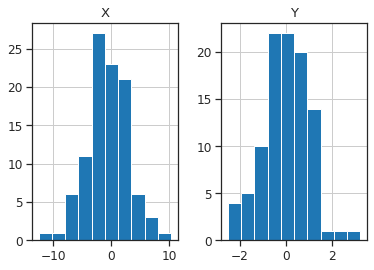

In [0]:
n = 100 
mean = [-1, 0]
cov = [[10, -1], [-1, 1]]
d = np.random.default_rng().multivariate_normal(mean, cov, n)
x = []
y = []

for row in d:
  x.append(row[0])
  y.append(row[1])

vector = pd.DataFrame(data={"X": x, "Y": y})
print(vector)
vector.hist()

## Вывод точек

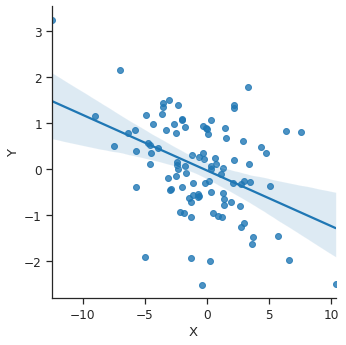

In [0]:
sns.lmplot(x='X', y='Y', data=vector, fit_reg=True)
plt.show()

## Расчёт коэффициента корреляции Пирсона

In [0]:
mx = vector['X'].mean()
my = vector['Y'].mean()
mxy = (vector['X'] * vector['Y']).mean()

vx = vector['X'].var()
vy = vector['Y'].var()
vxy = (vector['X'] * vector['Y']).var()

r_r = (mxy - mx*my)/(vx*vy)**0.5
print('Ручное', r_r)

r_auto = np.corrcoef(vector['X'], vector['Y'])[0, 1]

print('Автоматическое', r_auto)

Ручное -0.42567062935967614
Автоматическое -0.4299703326865417


##  Расчёт p-value

In [0]:
n = req_data['X'].size
t = abs(r_r) * ((n-2)/(1-r_r**2))**0.5

print('p-value: ', 2 * stats.t.sf(t, n-2))

p-value:  9.457073897993011e-14


## Описание корреляции признаков
Отвергаем гипотезу

# Часть 3

## Моделирование данных (x , y ) по функции y = ax + b + ε. В качестве ε нужно использовать гауссовский белый шум с нулевым математическим ожиданием и заданной дисперсией σ^2 . Значения x выбираются через равные промежутки на отрезке [0;1] (количество точек n, параметры a, b, σ согласно варианту)

n = 130

a = -2

b = -10

σ^2 = 0.05

In [0]:
n = 130
x = np.linspace(-2, 10, n)
e = np.random.normal(0, 0.05, n)
y = -2*x-2+e
data = pd.DataFrame({'X':x,'Y':y})
print(data)

             X          Y
0    -2.000000   1.999017
1    -1.906977   1.831853
2    -1.813953   1.580275
3    -1.720930   1.491418
4    -1.627907   1.202324
..         ...        ...
125   9.627907 -21.240085
126   9.720930 -21.428743
127   9.813953 -21.645888
128   9.906977 -21.832824
129  10.000000 -21.994054

[130 rows x 2 columns]


## Изображение на плоскости

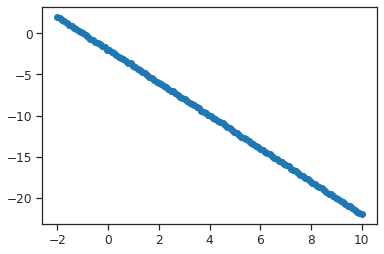

In [0]:
fig, ax = plt.subplots()
ax.scatter(x, y) 
plt.show()

## Линейная регрессия

Text(0.5, 10.255999999999986, 'Explanatory')

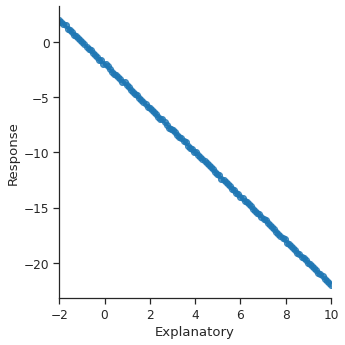

In [0]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
sns.lmplot('X','Y', data=data)
plt.ylabel('Response')
plt.xlabel('Explanatory')

## Линейная регрессия через sklearn

0.9998779865065185


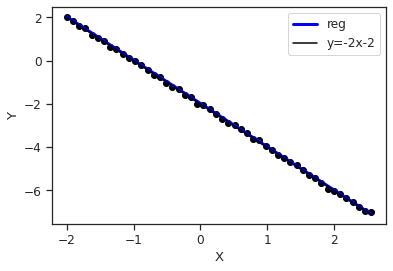

In [0]:
from sklearn import linear_model

linear = linear_model.LinearRegression()
trainX = np.asarray(data.X[50:len(data.X)]).reshape(-1, 1)
trainY = np.asarray(data.Y[50:len(data.Y)]).reshape(-1, 1)
testX = np.asarray(data.X[:50]).reshape(-1, 1)
testY = np.asarray(data.Y[:50]).reshape(-1, 1)
linear.fit(trainX, trainY)
print(linear.score(trainX, trainY))


predicted = linear.predict(testX)
plt.scatter(testX, testY,  color='black')
plt.plot(testX, predicted, color='blue', linewidth=3, label='reg')
plt.plot(testX, -2*testX-2, label='y=-2x-2', color = 'black')
plt.legend()

plt.xlabel('X')
plt.ylabel('Y')


plt.show()


## Линейная регрессия через матричное уравнение

In [0]:
X = data['X']
Y = data['Y']
XY = X * Y
a = np.array([[X.apply(lambda x: x*x).sum(), X.sum()], [X.sum(), n]])
b = np.array([XY.sum(), Y.sum()])
res = np.linalg.solve(a, b)
print('a =', res[0])
print('b =', res[1])

a = -2.0001522528999356
b = -1.9991101513638179


In [0]:
Y_REG = res[0]*X+res[1]
data.insert(2, column='Y_REG', value=Y_REG)
print(data)

             X          Y      Y_REG
0    -2.000000   1.999017   2.001194
1    -1.906977   1.831853   1.815134
2    -1.813953   1.580275   1.629073
3    -1.720930   1.491418   1.443012
4    -1.627907   1.202324   1.256952
..         ...        ...        ...
125   9.627907 -21.240085 -21.256390
126   9.720930 -21.428743 -21.442451
127   9.813953 -21.645888 -21.628511
128   9.906977 -21.832824 -21.814572
129  10.000000 -21.994054 -22.000633

[130 rows x 3 columns]


## Визуализация точек и 2 прямых

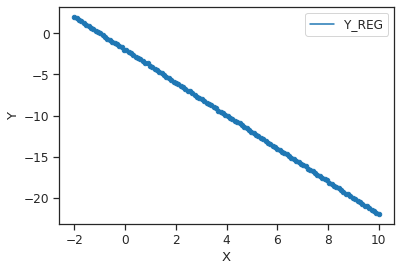

In [0]:
ax = data.plot.scatter(x='X', y='Y')

data.plot.line(
    x='X',
    y='Y_REG',
    ax=ax
)

## Вычисление коэффициента детерминации


In [0]:
rss = 0
tss = 0
y = data['Y'].sum() / data['Y'].size
for i in range(data['Y'].size):
  rss += (data['Y'][i] - data['Y_REG'][i])**2
for i in range(data['Y'].size):
  tss += (data['Y'][i] - y)**2
r = 1 - rss / tss

print(r)

0.999955652531705


## Получение всех данных из csv, вывод 

In [0]:
all_data = pd.read_csv('bands_new.csv')
#пришлось фильтровать столбцы 

all_data

,timestamp,cylinder number,customer,job number,grain screened,ink color,proof on ctd ink,blade mfg: nominal,cylinder division,paper type,ink type,direct steam,solvent type,type on cylinder,press type,press: nominal,unit number,cylinder size,paper mill location,plating tank,proof cut,viscosity,caliper,ink temperature,humifity,roughness,blade pressure,varnish pct,press speed,ink pct,solvent pct,ESA Voltage,ESA Amperage,wax,hardener,roller durometer,current density,anode space ratio,chrome content,band type
0,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,Motter94,821,2,TABLOID,NorthUS,None,55,46,0.3,15.0,80,0.75,20,6.6,1900,54.9,38.5,0,0.0,2.5,0.7,34,40,105,100,noband
1,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,WoodHoe70,815,9,CATALOG,NorthUS,None,62,40,0.433,16.0,80,None,30,6.5,1850,53.8,39.8,0,0.0,2.8,0.9,40,40,103.87,100,noband
2,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WoodHoe70,816,9,CATALOG,NorthUS,1910,52,40,0.3,16.0,75,0.3125,30,5.6,1467,55.6,38.8,0,0.0,2.5,1.3,40,40,108.06,100,noband
3,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,COATED,NO,LINE,YES,WoodHoe70,816,2,TABLOID,None,1910,50,46,0.3,17.0,80,0.75,30,0.0,2100,57.5,42.5,5,0.0,2.3,0.6,35,40,106.67,100,noband
4,19910104,T218,MASSEY,38039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,YES,WoodHoe70,816,2,CATALOG,NorthUS,1910,50,40,0.267,16.8,76,0.4375,28,8.6,1467,53.8,37.6,5,0.0,2.5,0.8,40,40,103.87,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,19900818,X91,LAZARUS,34154,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,NO,Motter94,828,2,TABLOID,None,1910,45,56,0.333,14.9,85,1,30,17.3,1600,48.1,34.6,0,0.0,2.8,1,40,35,100,100,noband
295,19900818,X132,LAZARUS,34154,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,UNCOATED,NO,LINE,NO,Motter94,828,10,TABLOID,CANADIAN,1910,30,56,0.367,14.7,83,1,30,10.8,1600,53.8,35.5,0,6.0,2.6,1.2,40,35,100,100,noband
296,19900820,X377,AMES,34585,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,Motter94,828,2,TABLOID,CANADIAN,1910,57.5,57,0.367,15.3,84,1,30,19.0,2400,47.6,33.3,0,0.0,3,1,33,40,93.75,100,noband
297,19900820,X129,AMES,34585,NO,KEY,YES,BENTON,GALLATIN,COATED,COATED,NO,LINE,YES,Motter94,828,10,TABLOID,CANADIAN,1910,57.5,57,None,14.2,78,1,30,10.5,2400,52.6,36.8,0,0.0,2.5,1,33,40,93.75,100,noband


## Создание нового датафрейма только с нужными признаками

In [0]:
req_data = all_data.loc[:, ['roughness', 'press speed']]
req_data.columns = ['X', 'Y']
for column in req_data.columns:
  req_data = req_data.loc[req_data[column].apply(lambda x: is_digit(str(x)))]
req_data = req_data.astype('float')
req_data

,X,Y
0,0.7500,1900.0
2,0.3125,1467.0
3,0.7500,2100.0
4,0.4375,1467.0
5,0.7500,2600.0
...,...,...
294,1.0000,1600.0
295,1.0000,1600.0
296,1.0000,2400.0
297,1.0000,2400.0


## Изображение точек на плоскости для этих двух признаков


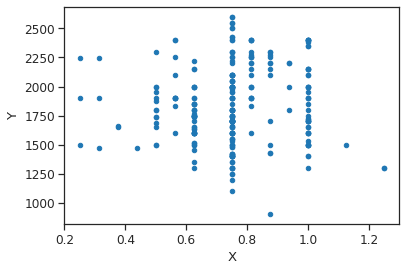

In [0]:
req_data.plot.scatter(
    x='X',
    y='Y'
)

plt.show()

## Построение модели линейной регрессии

In [0]:
X = req_data['X']
Y = req_data['Y']
XY = X * Y
a = np.array([[X.apply(lambda x: x*x).sum(), X.sum()], [X.sum(), n]])
b = np.array([XY.sum(), Y.sum()])
res = np.linalg.solve(a, b)
print('a =', res[0])
print('b =', res[1])

a = 2529.0710391562316
b = -163.78662400740726


In [0]:
Y_REG = res[0]*X+res[1]
req_data.insert(2, column='Y_REG', value=Y_REG)
print(req_data)

          X       Y        Y_REG
0    0.7500  1900.0  1733.016655
2    0.3125  1467.0   626.548076
3    0.7500  2100.0  1733.016655
4    0.4375  1467.0   942.681956
5    0.7500  2600.0  1733.016655
..      ...     ...          ...
294  1.0000  1600.0  2365.284415
295  1.0000  1600.0  2365.284415
296  1.0000  2400.0  2365.284415
297  1.0000  2400.0  2365.284415
298  0.7500  1600.0  1733.016655

[280 rows x 3 columns]


## Вывод точек и прямой

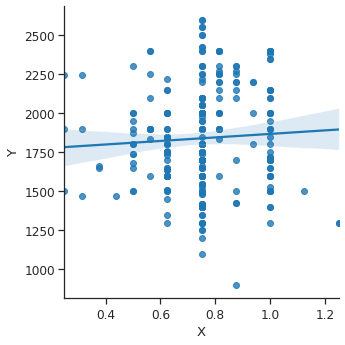

In [0]:
sns.lmplot(
    x='X',
    y='Y',
    data=req_data,
    fit_reg=True
)

plt.show()

## Вычислить коэффициент детерминации

In [0]:
rss = 0
tss = 0
y = req_data['Y'].sum() / req_data['Y'].size
for i in range(req_data['Y'].size):
  try:
    rss += (req_data['Y'][i] - req_data['Y_REG'][i])**2
  except KeyError:
    pass
for i in range(req_data['Y'].size):
  try:
    tss += (req_data['Y'][i] - y)**2
  except KeyError:
    pass  
r = 1 - rss / tss

print(r)

-1.664947349874434
